In [1]:
import pandas as pd
from CTL2.causal_tree_learn import CausalTree
from DGP.dgp2 import dgp2
from DGP.dgp1 import dgp1
from DGP.dgp3 import dgp3
from DGP.dgp4 import dgp4
from DGP.dgp4eps import dgp4eps
from DGP.dgp5 import dgp5

from MC.mc1 import MC_MSE_1
from MC.mc2 import MC_MSE_2
from MC.mc2_maxd import MC_MSE_2max
import timeit
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from random import random

from sklearn.metrics import mean_squared_error as mse

import pickle as pkl
from notify_run import Notify 
notify = Notify() 

In [56]:
def mcreps_mse_all2(reps, n, nomin_test):    
    ATE1 = []
    ATE0 = []
    MSEt = []
    MSEb = []
    MSEv = []
    true = np.ones(reps)
    
    for i in range(reps):
        x_train, x_test, y_train, y_test, treat_train, treat_test = dgp4(n)
        x1 = x_test[:,0]
        tau = np.where(x1 >= 0, 1.0, -1.0)
        ctl_predict = MC_MSE_2(x_train, x_test, y_train, y_test, treat_train, treat_test, nomin_test)
        ATE1.append(np.mean(ctl_predict[np.where(x1 > 0)]))
        ATE0.append(np.mean(ctl_predict[np.where(x1 < 0)]))
        nn = int(len(ctl_predict))
        MSEt.append(mse(ctl_predict,tau))
        MSEb.append(np.sum(np.subtract(ctl_predict,tau))/nn)
        MSEv.append(np.var(ctl_predict))
    mse_total = np.sum(np.array(MSEt))/reps
    mse1 = mse(np.array(ATE1),true)
    mse2 = mse(np.array(ATE0),true*-1)
    bias1 = np.sum(np.subtract(np.array(ATE1),true))/reps
    bias2 = np.sum(np.add(np.array(ATE0), true))/reps
    var1 = np.var(ATE1)
    var2 = np.var(ATE0)
    mseb = np.sum(np.array(MSEb))/reps
    msev = np.sum(np.array(MSEv))/reps
    return mse1, mse2, bias1, bias2, var1, var2, mse_total, mseb, msev

In [2]:
def mcreps_mse_only(reps, n, nomin_test):    

    MSEt = []
    #MSEb = []
    #MSEv = []
    
    for i in range(reps):
        x_train, x_test, y_train, y_test, treat_train, treat_test = dgp4(n)
        x1 = x_test[:,0]
        tau = np.where(x1 >= 0, 1.0, -1.0)
        ctl_predict = MC_MSE_2max(x_train, x_test, y_train, y_test, treat_train, treat_test, nomin_test)
        #nn = n*0.5
        MSEt.append(mse(ctl_predict,tau))
        #MSEb.append(np.sum(np.subtract(ctl_predict,tau))/nn)
        #MSEv.append(np.var(ctl_predict))
        
    mse_total = np.sum(np.array(MSEt))/reps
    #mseb = np.sum(np.array(MSEb))/reps
    #msev = np.sum(np.array(MSEv))/reps
    #return mse_total, mseb, msev
    return mse_total

In [3]:
def mcreps_mse_only2(reps, n, nomin_test):    

    MSEt = []
    
    for i in range(reps):
        x_train, x_test, y_train, y_test, treat_train, treat_test = dgp4eps(n)
        x1 = x_test[:,0]
        tau = np.where(x1 >= 0, 1.0, -1.0)
        ctl_predict = MC_MSE_2max(x_train, x_test, y_train, y_test, treat_train, treat_test, nomin_test)
        MSEt.append(mse(ctl_predict,tau))
        
    mse_total = np.sum(np.array(MSEt))/reps
    return mse_total

In [4]:
MSE_TOTAL = []

test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

n = 1000
reps = 700

for size in test_sizes:
    mse_total = mcreps_mse_only(reps,n,size)    
    MSE_TOTAL.append(mse_total)
    
df2 = pd.DataFrame(np.array(MSE_TOTAL),test_sizes)
with open('testmse_1000_700maxdepth.pkl','wb') as f:
    pkl.dump(df2, f)
    
notify.send('Done running the simulations 5')

In [5]:
MSE_TOTAL = []

test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

n = 1000
reps = 700

for size in test_sizes:
    mse_total = mcreps_mse_only2(reps,n,size)    
    MSE_TOTAL.append(mse_total)
    
df3 = pd.DataFrame(np.array(MSE_TOTAL),test_sizes)
with open('testmse_1000_700epsmaxdepth.pkl','wb') as f:
    pkl.dump(df3, f)
    
notify.send('Done running the simulations 6')

In [6]:
df3

,0
0.2,1.325450
0.3,1.236835
0.4,1.159664
0.5,1.055034
0.6,0.934147
0.7,0.779924
0.8,0.733556
0.9,0.823728


In [4]:
MSE_TOTAL = []

test_sizes = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]

n = 2000
reps = 1000

for size in test_sizes:
    mse_total = mcreps_mse_only(reps,n,size)    
    MSE_TOTAL.append(mse_total)
    
df3 = pd.DataFrame(np.array(MSE_TOTAL),test_sizes)
with open('testmse_1000_2000.pkl','wb') as f:
    pkl.dump(df3, f)
    
notify.send('Done running the simulations 2')

In [ ]:
df3

In [10]:
MSE1 = []
MSE2 = []
BIAS1 = []
BIAS2 = []
VAR1 = []
VAR2 = []
MSE_TOTAL = []
MSEB = []
MSEV = []
test_sizes = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]

n = 1000
reps = 5

for size in test_sizes:
    mse1, mse2, bias1, bias2, var1, var2, mse_total, mseb, msev = mcreps_mse_all2(reps,n,size)    
    MSE1.append(mse1)
    MSE2.append(mse2)
    BIAS1.append(bias1)
    BIAS2.append(bias2)
    VAR1.append(var1)
    VAR2.append(var2)
    MSEB.append(mseb)
    MSEV.append(msev)
    MSE_TOTAL.append(mse_total)

df = pd.DataFrame([test_sizes, MSE1, MSE2, BIAS1, BIAS2, VAR1, VAR2, MSE_TOTAL, MSEB, MSEV]).transpose().set_index(0)
df.columns=['MSE1', 'MSE2', 'BIAS1', 'BIAS2', 'VAR1', 'VAR2', 'MSE_TOTAL', 'MSE_T_BIAS', 'MSE_T_VAR']

#with open('test10_eps15_1000_1000.pkl','wb') as f:
#    pkl.dump(df, f)

#notify.send('Done running the simulations 10eps')


In [11]:
df

,MSE1,MSE2,BIAS1,BIAS2,VAR1,VAR2,MSE_TOTAL,MSE_T_BIAS,MSE_T_VAR
0,,,,,,,,,
0.25,0.554829,0.252361,-0.295068,-0.330522,0.467764,0.143116,1.916659,-0.311181,2.776458
0.30,0.344625,0.214575,-0.052598,0.316770,0.341858,0.114232,1.594410,0.121819,2.053087
0.35,0.296707,0.501176,-0.009935,0.365701,0.296608,0.367439,2.129004,0.167595,2.472993
0.40,0.349619,0.152238,-0.345458,0.114651,0.230277,0.139093,1.340353,-0.100483,1.847375
0.45,0.162622,0.088092,-0.172122,0.188870,0.132996,0.052420,0.987835,0.015857,1.614241
0.50,0.170679,0.154345,-0.294450,0.191345,0.083978,0.117732,1.107137,-0.044754,1.550736
0.55,0.080712,0.078928,0.134185,0.065501,0.062706,0.074637,1.242854,0.101810,2.268794
0.60,0.242495,0.112868,0.048212,0.068109,0.240170,0.108229,1.438401,0.061585,2.399037
0.65,0.223638,0.214739,-0.440908,0.216378,0.029238,0.167920,1.284358,-0.113169,1.555470


In [5]:
df

NameError: name 'df' is not defined

In [10]:
try:
    MSE1 = []
    MSE2 = []
    BIAS1 = []
    BIAS2 = []
    VAR1 = []
    VAR2 = []
    MSE_TOTAL = []
    MSEB = []
    MSEV = []
    test_sizes = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]

    n = 1000
    reps = 1000

    for size in test_sizes:
        mse1, mse2, bias1, bias2, var1, var2, mse_total, mseb, msev = mcreps_mse_all2b(reps,n,size)    
        MSE1.append(mse1)
        MSE2.append(mse2)
        BIAS1.append(bias1)
        BIAS2.append(bias2)
        VAR1.append(var1)
        VAR2.append(var2)
        MSEB.append(mseb)
        MSEV.append(msev)
        MSE_TOTAL.append(mse_total)

    df2 = pd.DataFrame([test_sizes, MSE1, MSE2, BIAS1, BIAS2, VAR1, VAR2, MSE_TOTAL, MSEB, MSEV]).transpose().set_index(0)
    df2.columns=['MSE1', 'MSE2', 'BIAS1', 'BIAS2', 'VAR1', 'VAR2', 'MSE_TOTAL', 'MSE_T_BIAS', 'MSE_T_VAR']
    
    with open('test10_x56_1000_1000.pkl','wb') as f:
        pkl.dump(df2, f)
    
    notify.send('Done running the simulations 10x56')
    
except:
    notify.send('error')

In [5]:
df = pd.DataFrame([test_sizes, MSE1, MSE2, BIAS1, BIAS2, VAR1, VAR2, MSE_TOTAL, MSEB, MSEV]).transpose().set_index(0)
df.columns=['MSE1', 'MSE2', 'BIAS1', 'BIAS2', 'VAR1', 'VAR2', 'MSE_TOTAL', 'MSE_T_BIAS', 'MSE_T_VAR']

In [24]:
df

,MSE1,MSE2,BIAS1,BIAS2,VAR1,VAR2
0,,,,,,
0.25,0.175236,0.189333,-0.070723,0.059330,0.170234,0.185813
0.30,0.151554,0.168603,-0.094193,0.091370,0.142682,0.160255
0.35,0.132250,0.129276,-0.108429,0.104286,0.120493,0.118401
0.40,0.102029,0.097635,-0.103664,0.083333,0.091283,0.090691
0.50,0.092636,0.090115,-0.109672,0.101280,0.080608,0.079857
0.60,0.079619,0.097760,-0.110954,0.142834,0.067309,0.077359
0.70,0.113973,0.116840,-0.194392,0.205625,0.076185,0.074559
0.75,0.139793,0.128258,-0.239417,0.228907,0.082473,0.075859


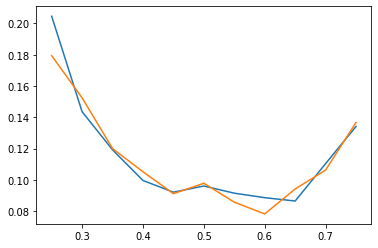

In [12]:
plt.plot(df['MSE1'])
plt.plot(df['MSE2'])

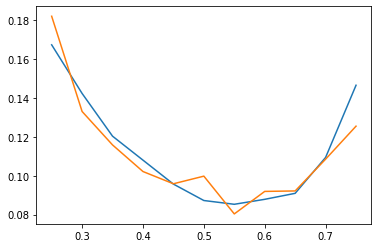

In [9]:
plt.plot(df['MSE1'])
plt.plot(df['MSE2'])

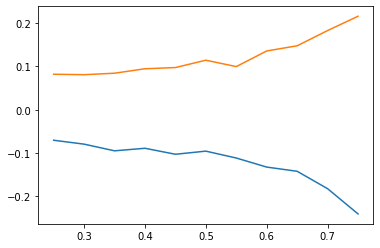

In [10]:
plt.plot(test_sizes, BIAS1)
plt.plot(test_sizes, BIAS2)

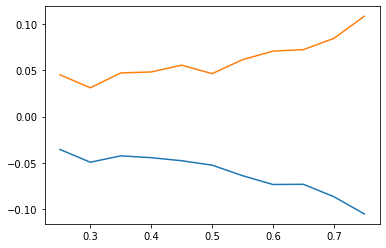

In [7]:
plt.plot(test_sizes, BIAS1)
plt.plot(test_sizes, BIAS2)

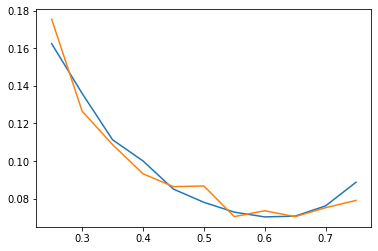

In [11]:
plt.plot(test_sizes, VAR1)
plt.plot(test_sizes, VAR2)

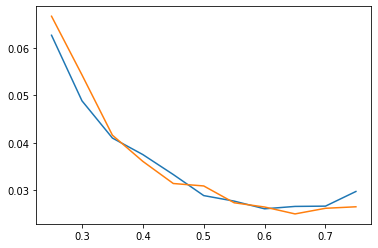

In [8]:
plt.plot(test_sizes, VAR1)
plt.plot(test_sizes, VAR2)

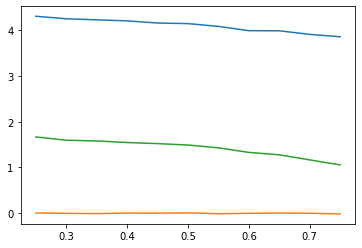

In [12]:
plt.plot(test_sizes, MSE_TOTAL)
plt.plot(test_sizes, MSEB)
plt.plot(test_sizes, MSEV)

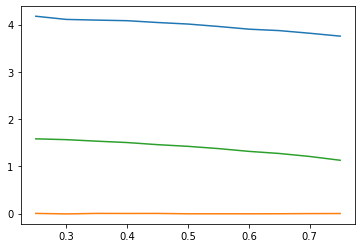

In [9]:
plt.plot(test_sizes, MSE_TOTAL)
plt.plot(test_sizes, MSEB)
plt.plot(test_sizes, MSEV)

In [55]:
test_sizes = [0.2, 0.25, 0.3, 0.4, 0.5]

MSE1 = []
MSE2 = []

n = 1000
reps = 100
nomin_test = 0.5

for size in test_sizes:
    mse1, mse2 = mcreps2(reps,n,nomin_test)
    MSE1.append(mse1)
    MSE2.append(mse2)

done
done
done
done
done


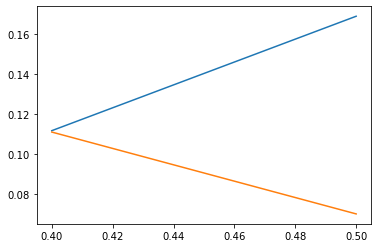

In [13]:
plt.plot(test_sizes, MSE1)
plt.plot(test_sizes, MSE2)

In [ ]:
test_sizes = [0.2, 0.3, 0.5, 0.7]

MSE1 = []
MSE2 = []

n = 1000
reps = 100
nomin_test = 0.5

for size in test_sizes:
    mse1, mse2 = mcreps2(reps,n,nomin_test)
    MSE1.append(mse1)
    MSE2.append(mse2)

done
done
